In [1]:
from skimage import measure,data,segmentation,filters,draw,color,io
import numpy as np
import matplotlib.pyplot as plt

image = color.rgb2gray(io.imread('DJI_0907.jpg'))
image = measure.block_reduce(image,block_size=(3, 3), func=np.median)

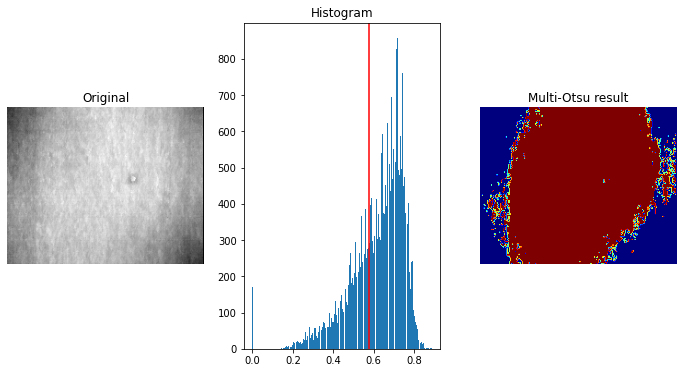

In [6]:
thresholds = filters.threshold_multiotsu(image, classes=2)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()


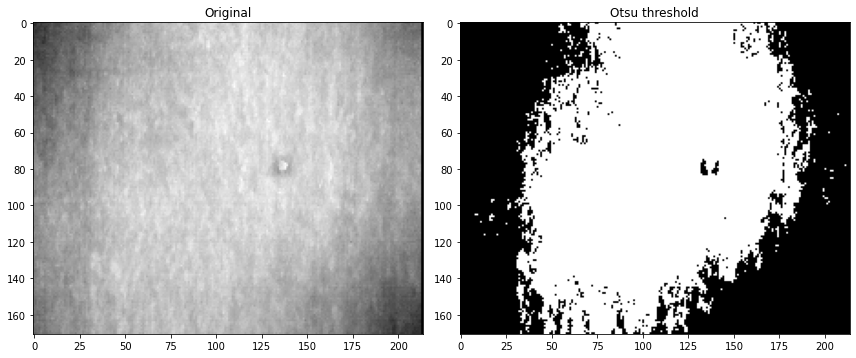

In [3]:
image_threshold = ~((image > thresholds[0]).all and image < thresholds[1])
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()


ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(image_threshold, cmap=plt.cm.gray)
ax[1].set_title("Otsu threshold")

fig.tight_layout()



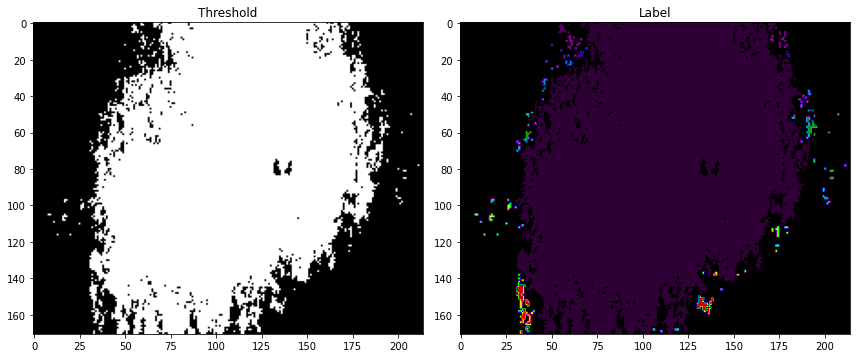

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()


ax[0].imshow(image_threshold, cmap=plt.cm.gray)
ax[0].set_title("Threshold")

labels = measure.label(image_threshold,connectivity=2,background=0)

ax[1].imshow(labels, cmap='nipy_spectral')
ax[1].set_title("Label")

fig.tight_layout()


[]

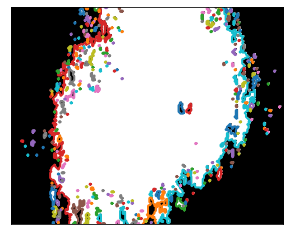

In [5]:
contours = measure.find_contours(image_threshold)
fig, ax = plt.subplots()
ax.imshow(image_threshold, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])